In [400]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re

## **2.1 Классификация документов**

In [401]:
data = pd.read_html("/content/Выгрузка 9 апреля.xls")
df = data[1].drop(['№ п/п', '№документа', 'Исх. №Дата', 'Примечание'], axis=1)
df.head()

,Датарегистрации,Адресат,Автор,Краткоесодержание
0,09.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
1,09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...
2,09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....
3,09.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...
4,09.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...


In [402]:
df['Агенство'] = df.Автор.apply(lambda x: x.split("(")[1].replace(')',''))

In [403]:
df['Автор'] = df.Автор.apply(lambda x: x.split("(")[0] + x.split(")")[1])

In [404]:
agents = []
agents_number_one = ['Министерств', 'Правительств', 'Федеральн', 'Администр']
for i in df.Агенство:
  br = 0
  for t in agents_number_one:
    if br:
      break
    if t in i:
      br=1
      agents.append(1)
  if not(br):
    agents.append(0)

In [405]:
df['Тип_агенства'] = list(agents)
df.head()

,Датарегистрации,Адресат,Автор,Краткоесодержание,Агенство,Тип_агенства
0,09.04.2019,Уразов Р.Н.,Антонова С.В.,Вх - О возможности использования сетевого изда...,АО «Интерфакс»,0
1,09.04.2019,Уразов Р.Н.,Картошкин С.А.,Вх - Об участии в совещании по вопросу доработ...,Министерство просвещения Российской Федерации,1
2,09.04.2019,Уразов Р.Н.,Цивилев С.Е.,Вх - О командировании Саликовой К. и Глушко Д....,Администрация Кемеровской области,1
3,09.04.2019,Иванюк Л.А.,Волков Г.А.,Вх - Об участии в Чемпионате мира по профессио...,Министерство транспорта Российской Федерации,1
4,09.04.2019,Уразов Р.Н.,Атанов И.В.,Вх - Об участии в церемонии открытия Вузовског...,Ставропольский государственный аграрный универ...,0


In [406]:
df_train.isna().sum()

Датарегистрации      0
Адресат              0
Автор                0
Краткоесодержание    0
Агенство             0
Тип_агенства         0
dtype: int64

In [407]:
df_train = df_train.fillna(-1)

In [408]:
df_train.isna().sum()

Датарегистрации      0
Адресат              0
Автор                0
Краткоесодержание    0
Агенство             0
Тип_агенства         0
dtype: int64

In [409]:
df_test.isna().sum()

Датарегистрации      0
Адресат              0
Автор                0
Краткоесодержание    0
Агенство             0
Тип_агенства         0
dtype: int64

In [410]:
df_test = df_test.fillna(-1)

In [411]:
df_test.isna().sum()

Датарегистрации      0
Адресат              0
Автор                0
Краткоесодержание    0
Агенство             0
Тип_агенства         0
dtype: int64

In [412]:
df_test.shape

(1242, 6)

In [413]:
df_train.shape

(3725, 6)

In [414]:
df_train.shape[0]/df_test.shape[0]

2.999194847020934

In [415]:
print(df_train.duplicated().sum())

19


In [416]:
print(df_test.duplicated().sum())

1


In [417]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [418]:
X = df.Адресат
y = df.Тип_агенства

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [420]:
vectorizer = TfidfVectorizer(max_features = 10000)

In [421]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [422]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score

In [423]:
%%time
model_SVC = SVC(C = 1, kernel = 'linear')
model_SVC.fit(X_train, y_train)
res = model_SVC.predict(X_test)

CPU times: user 281 ms, sys: 7.7 ms, total: 289 ms
Wall time: 289 ms


In [424]:
f1_svm = f1_score(y_test, res, average='macro')
f1_svm

0.5693748865904554

In [425]:
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       627
           1       0.48      0.39      0.43       367

    accuracy                           0.62       994
   macro avg       0.58      0.57      0.57       994
weighted avg       0.60      0.62      0.61       994



Я выбрал данную модель, потому что она внатуре лучшая, выдала лучшие результаты и показала высокую точность классификации по сравнению с другими, проверяемые мною.

## **2.2 Визуализация зависимостей данных**

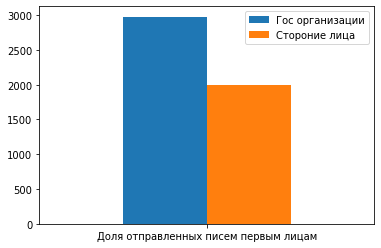

In [426]:
#Доля отправки писем каждой категории агенства
type_agenstv = df.Тип_агенства.value_counts().reset_index().values
data = [i[1] for i in type_agenstv]
agents = ["Гос организации","Стороние лица"]

dictionary = dict(zip(agents, data))
info = pd.DataFrame(dictionary, index=["Доля отправленных писем первым лицам"])
fig, ax = plt.subplots()
info.plot(kind='bar', ax=ax, rot=0)

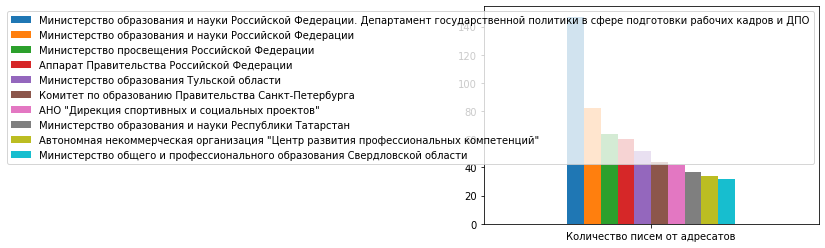

In [427]:
#Анализ по количеству пришедших писем
ten = df.Агенство.value_counts()[:10]
dict_ten = {}
for i in ten.reset_index().values:
  dict_ten[i[0]] = i[1]
info = pd.DataFrame(dict_ten, index=["Количество писем от адресатов"])
fig, ax = plt.subplots()
info.plot(kind='bar', ax=ax, rot=0)

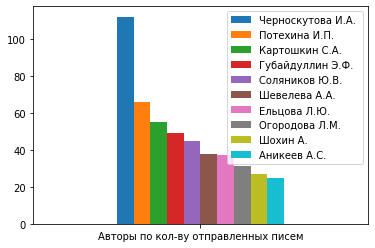

In [428]:
#Анализ авторов по количеству отправленных писем
ten = df.Автор.value_counts()[:10]
dict_ten = {}
for i in ten.reset_index().values:
  dict_ten[i[0]] = i[1]
info = pd.DataFrame(dict_ten, index=["Авторы по кол-ву отправленных писем"])
fig, ax = plt.subplots()
info.plot(kind='bar', ax=ax, rot=0)